<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_05_NormalEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Normal equation
Se puede encontrar una solucion exacta para theta sin necesidad de emplear el gradiente descente de la sesiones pasadas, para ellos se puede encontrar el valor minimo de theta y a partir de alli determinar el valor de theta que minimiza J.

Los pasos para esta minimizacion se dejan como tarea, y pueden ser calculados según lo siguiente:

Si J es la funcion de coste dada por:

\begin{equation}
J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X - \hat{y}^{(i)})^2
\end{equation}


Demostrar que:

- $J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y^T) (\Theta ^ T X - y^T)^T$

- $J= (\Theta ^T X) (\Theta ^T X)^T - 2(\Theta ^T X)Y  + Y^TY $


- $ \nabla _{\theta} J = \frac{1}{m} (2 X(X^T \Theta) -2XY)$


Para encontrar el valor minimo de \theta,  $\nabla _{\theta} J = 0$,

- $\Theta = (X^T X)^{-1} X^T y$



En este caso,tenemos que:

sea $X \in R^{n\times m}$ ,  $X^T \in R^{m\times n}$

sea $Y \in R^{m \times 1}$,  $Y^T \in R^{1 \times m}$

sea $\Theta \in R^{n \times 1}$, $\Theta^T \in R^{1 \times n}$




Para la demostracion anterior emplee las siguientes propiedades:

- $z^T z= \sum_i z_i^2$
- $a^T b = b^Ta$
- $\nabla _x b^T x = b$
- $\nabla _x  x^T A x = 2Ax$

donde a, b, x son matrices, $\nabla_x$ es la derivada respecto al vector x, y A es una matriz simétrica




# Demostración Matemática del Modelo de Regresión Lineal

## **1. Modelo lineal**

El modelo de regresión lineal asume que la variable objetivo $y$ puede aproximarse mediante una combinación lineal de los predictores $x_1, x_2, \ldots, x_n$:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

o en forma matricial:

$$
\hat{y} = X\beta
$$

---

## **2. Función de pérdida: Error Cuadrático Medio (MSE)**

El objetivo es minimizar:

$$
J(\beta) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

En forma matricial:

$$
J(\beta) = \frac{1}{m} (y - X\beta)^\top (y - X\beta)
$$

---

## **3. Derivación de la solución cerrada (Ecuación Normal)**

Se deriva $J(\beta)$ respecto a $\beta$:

$$
\nabla_\beta J(\beta) = -\frac{2}{m} X^\top (y - X\beta)
$$

Se iguala a cero para encontrar el mínimo:

$$
X^\top (y - X\beta) = 0
$$

$$
X^\top X \, \beta = X^\top y
$$

Finalmente, despejando:

$$
\beta = (X^\top X)^{-1} X^\top y
$$

(esta solución requiere que $X^\top X$ sea invertible; en la práctica se usan regularizadores si no lo es).

---

## **4. Coeficiente de Determinación $R^2$**

La métrica usada en el método `.score()` para regresión lineal es el coeficiente de determinación $R^2$:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

donde:

$$
SS_{\text{res}} = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

$$
SS_{\text{tot}} = \sum_{i=1}^{m} (y_i - \bar{y})^2
$$

Un valor de $R^2$ cercano a 1 indica un buen ajuste; cercano a 0 indica que el modelo no explica la variación en los datos.

---


In [2]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

1. Para los datos del laboratorio anterior aplicar la ecuacion normal.


In [3]:
# Número de muestras (puntos de datos)
N = 100

# Generación de las dos variables independientes x₁ y x₂ en el rango [-1, 1]
x_1=2*np.random.random(N)-1
x_2=2*np.random.random(N)-1

# Cálculo de la variable dependiente (etiqueta)
y_label=2.1*x_1-3.1*x_2

df=pd.DataFrame({"x1":x_1, "x2":x_2, "y":y_label})

df

,x1,x2,y
0,-0.854124,-0.584023,0.016809
1,0.466030,-0.341985,2.038816
2,-0.805506,-0.970251,1.316217
3,0.639506,-0.948649,4.283774
4,0.597056,0.962420,-1.729683
...,...,...,...
95,-0.843232,-0.632003,0.188423
96,0.037859,-0.803900,2.571594
97,-0.159275,0.651938,-2.355486
98,-0.812579,0.605070,-3.582132


In [4]:
def theta(X, Y):
    """
    Calcula los parámetros óptimos del modelo de regresión lineal utilizando la ecuación normal.

    Parámetros:
    -----------
    X : ndarray (shape = (n+1, m))
        Matriz de características, donde cada columna representa una muestra.
    Y : ndarray (shape = (1, m))
        Valores reales de salida (etiquetas verdaderas).

    Retorna:
    --------
    theta_opt : ndarray (shape = (n+1, 1))
        Vector de parámetros óptimos del modelo.
    """
    # Cálculo de θ utilizando la ecuación normal: θ = ((X·Xᵀ)⁻¹·X·Yᵀ)ᵀ
    theta_opt = (np.linalg.inv(X @ X.T) @ X @ Y.T).T
    return theta_opt

In [5]:
# Número de datos de entrenamiento 

m=N
# Características (2: x_1, x_2)
n=2

X=np.zeros((n+1,m))
X[0,:]=1 
X[1,:]=df['x1']
X[2,:]=df['x2']

print(np.shape(X))
X

Y = df['y'].values.reshape(1, -1)

(3, 100)


In [6]:
theta(X, Y)


array([[ 1.2490009e-16,  2.1000000e+00, -3.1000000e+00]])

2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

```
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

```

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

df=pd.DataFrame(data)

df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_14501/2115401742.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
variables=[ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]


In [11]:
df.columns=variables
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


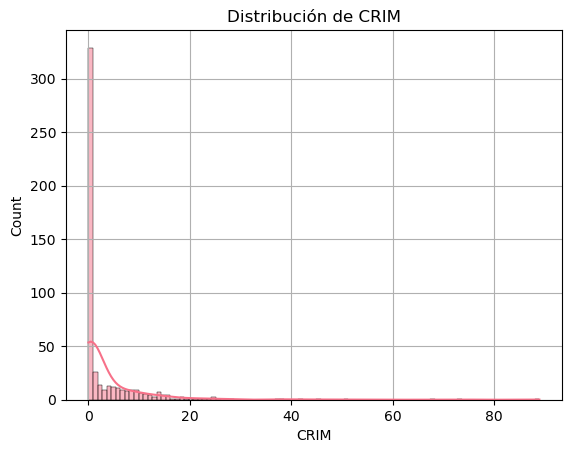

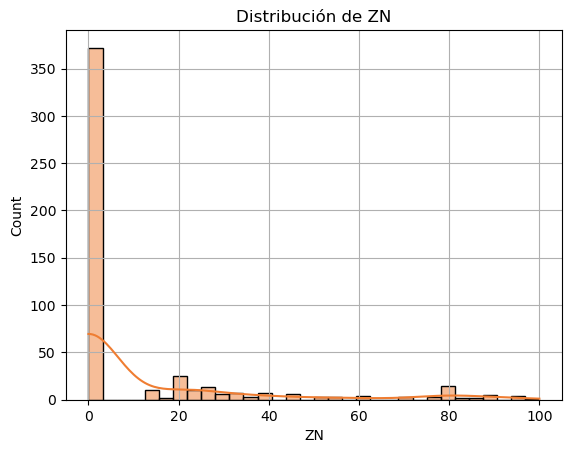

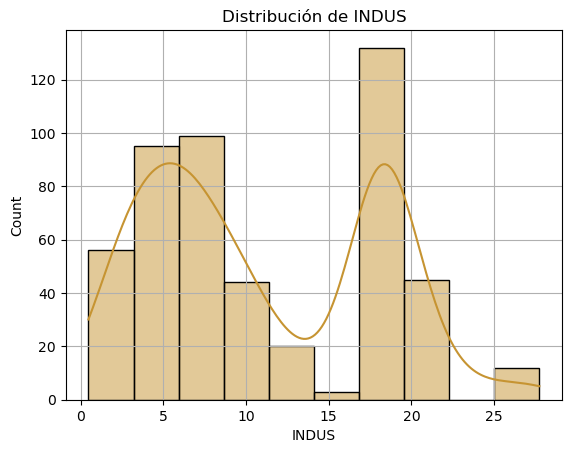

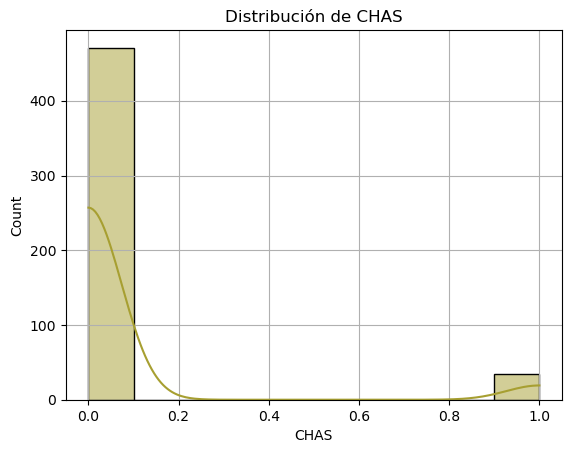

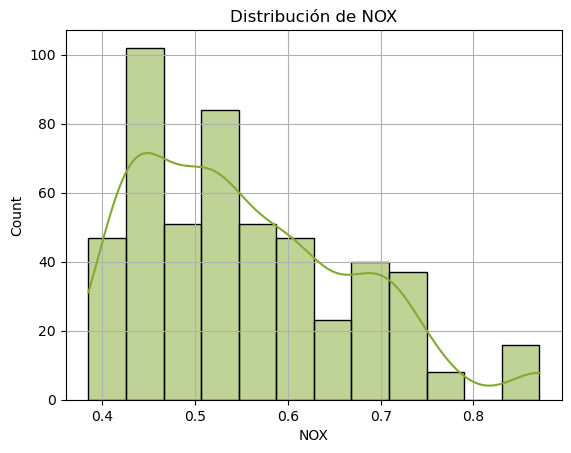

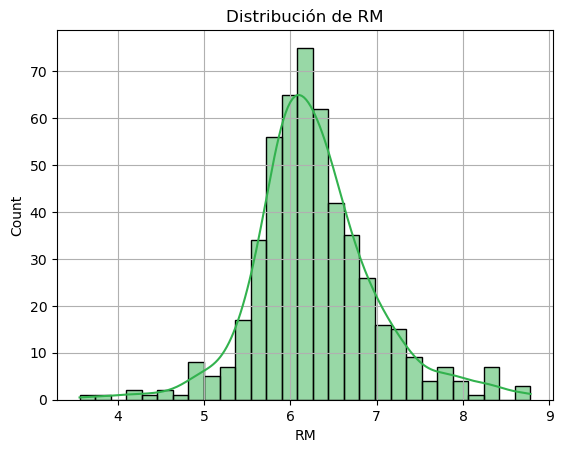

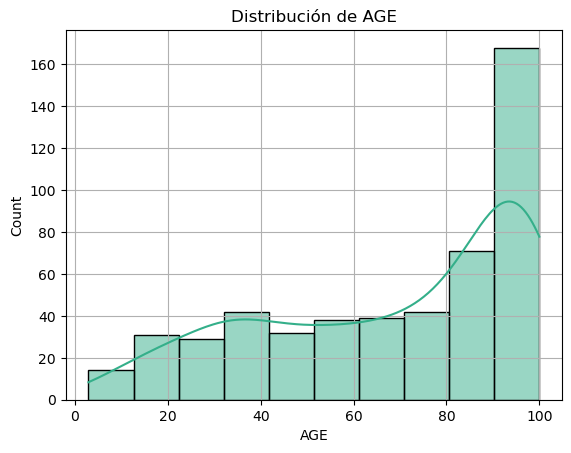

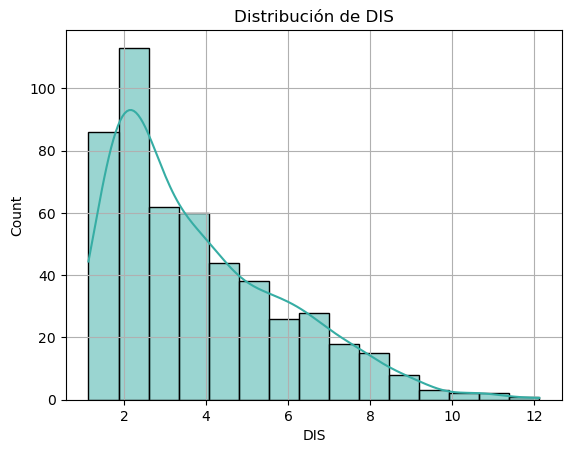

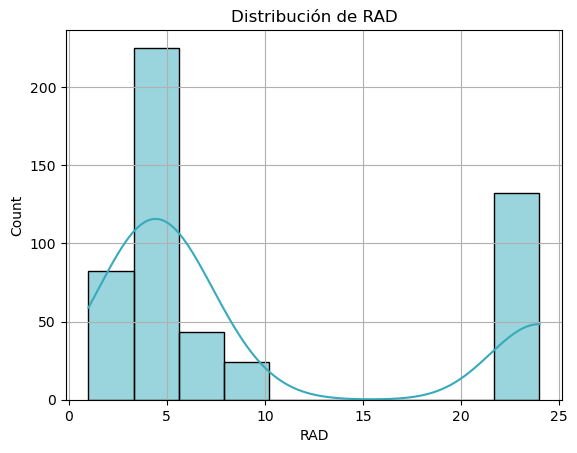

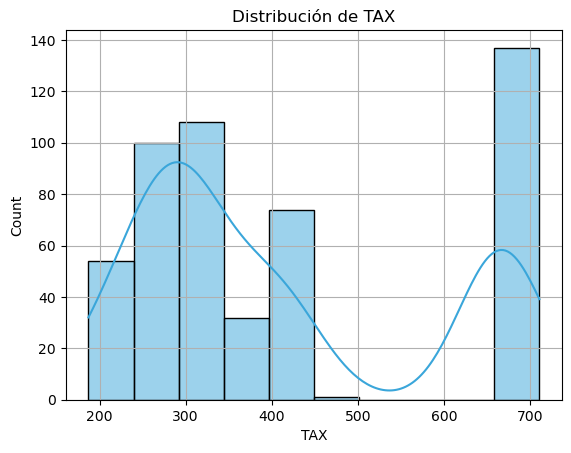

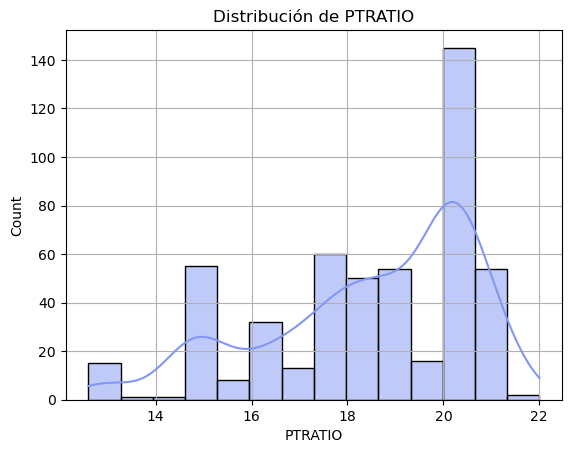

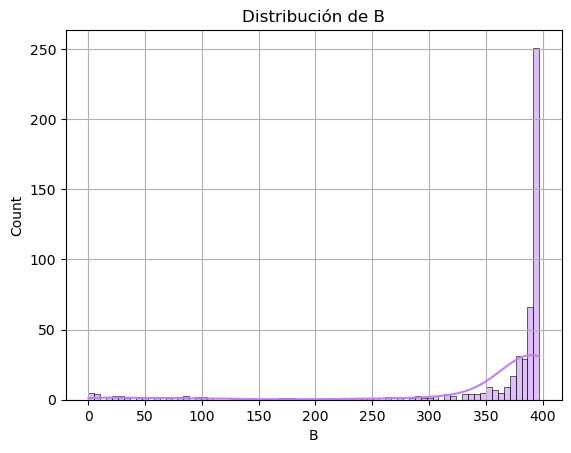

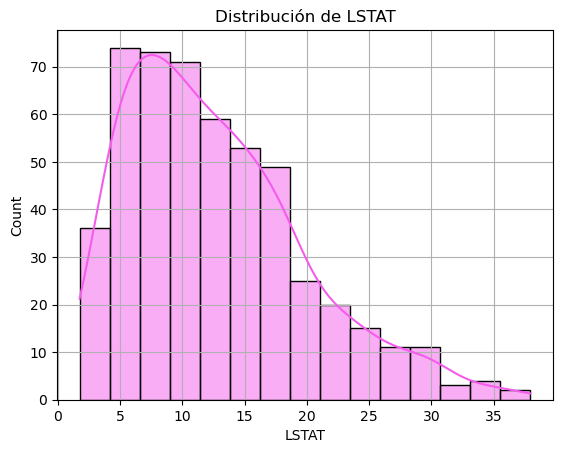

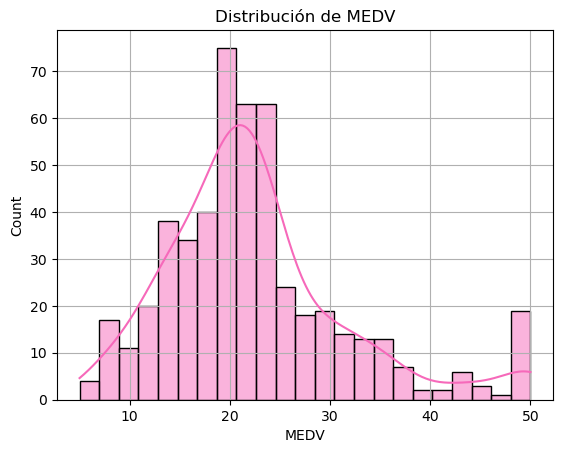

In [15]:
palette = sns.color_palette("husl", len(df.columns))

for idx, col in enumerate(df.columns):
    plt.figure()
    sns.histplot(df[col], kde=True, color=palette[idx])
    plt.title(f'Distribución de {col}')
    plt.grid()
    plt.show()


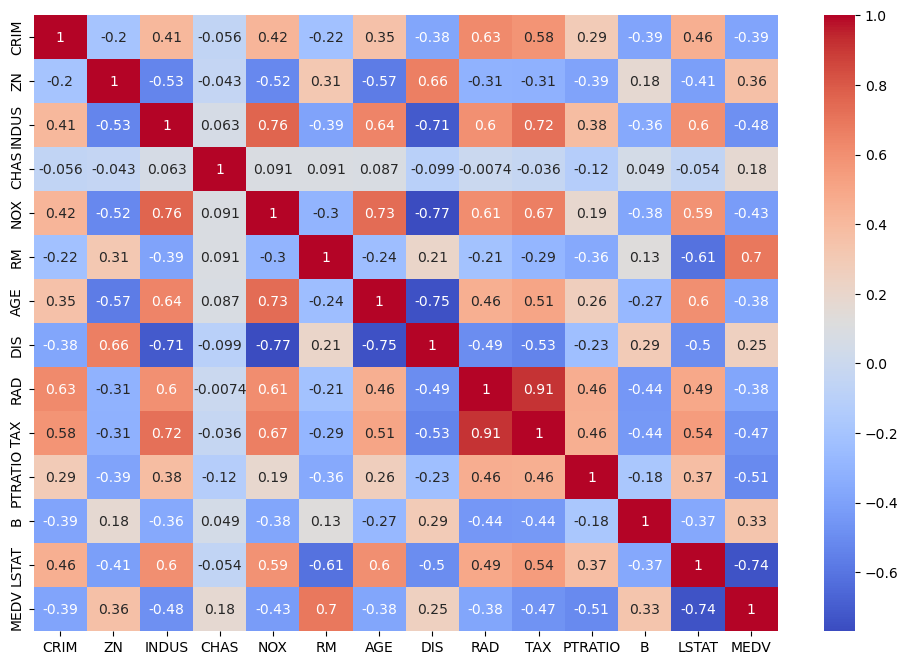

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

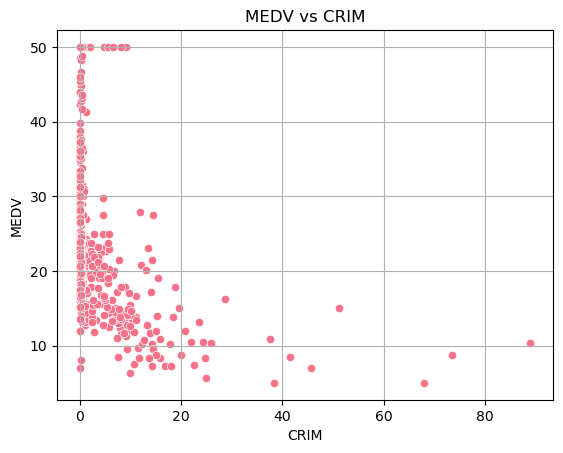

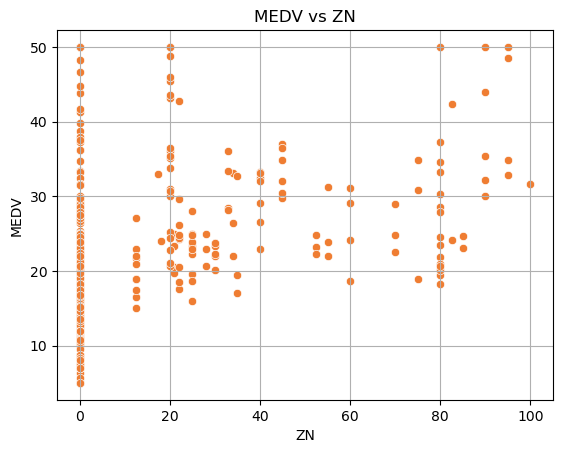

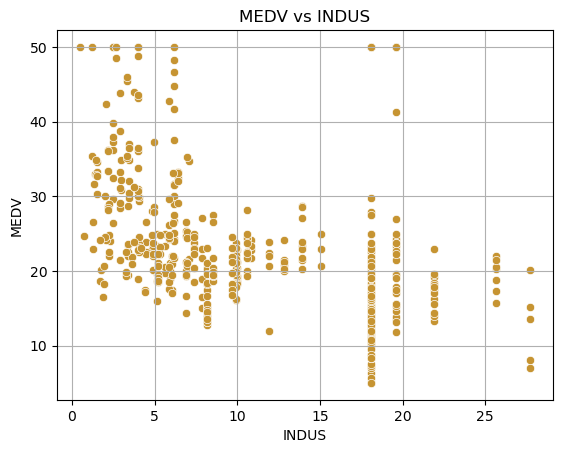

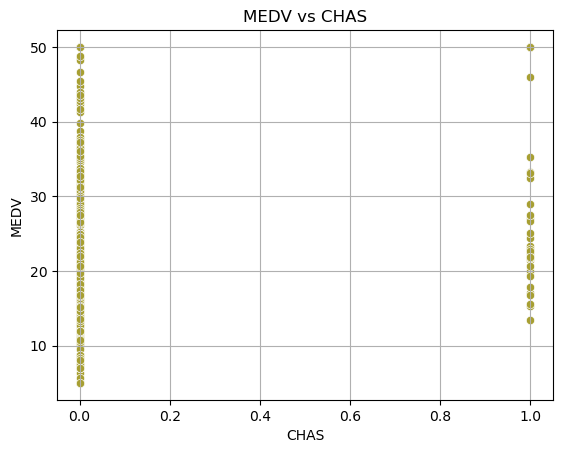

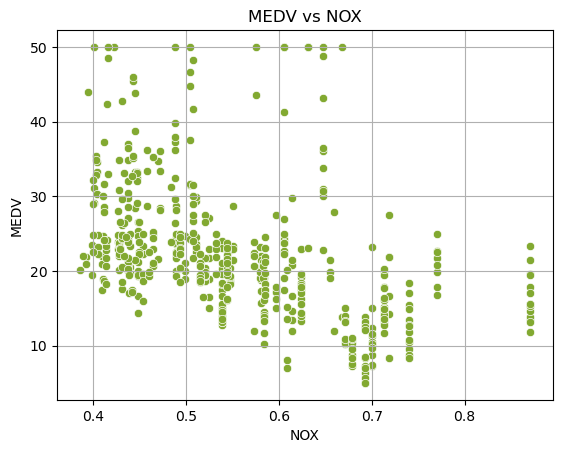

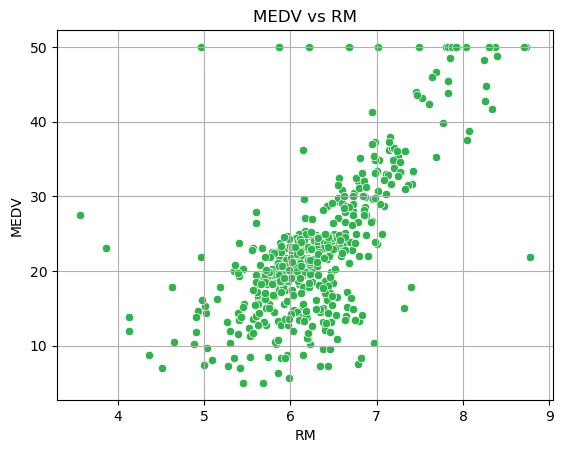

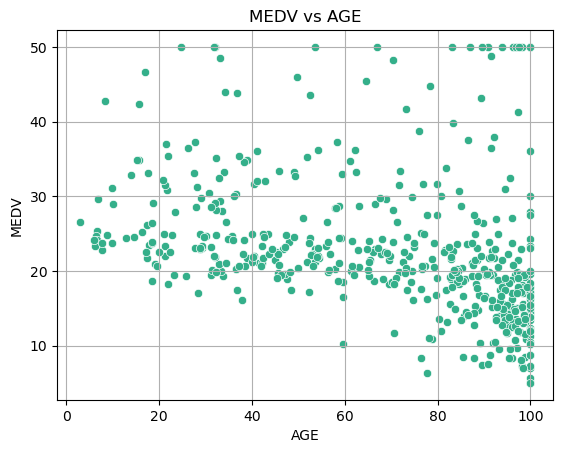

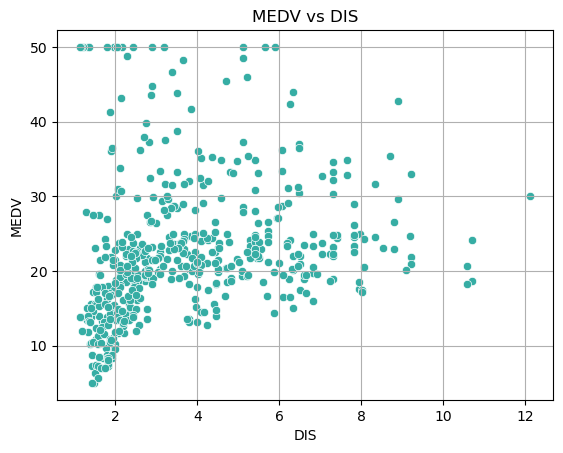

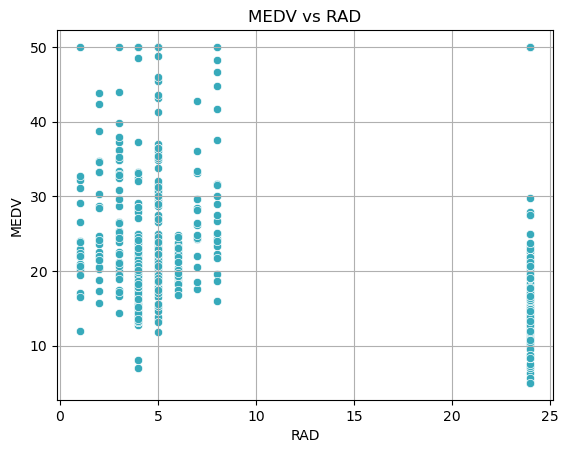

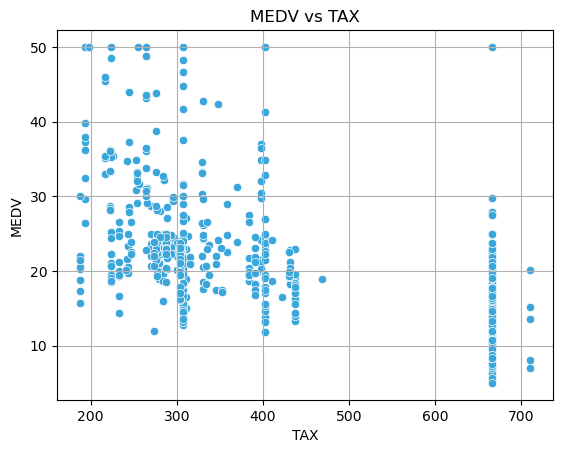

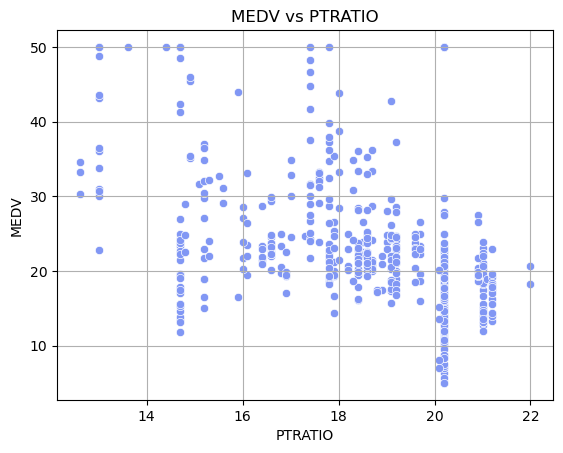

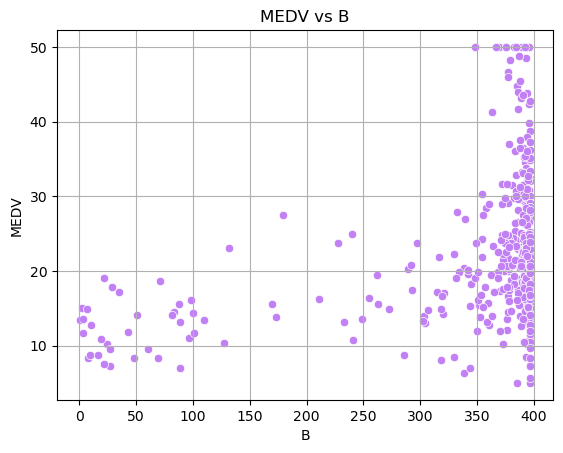

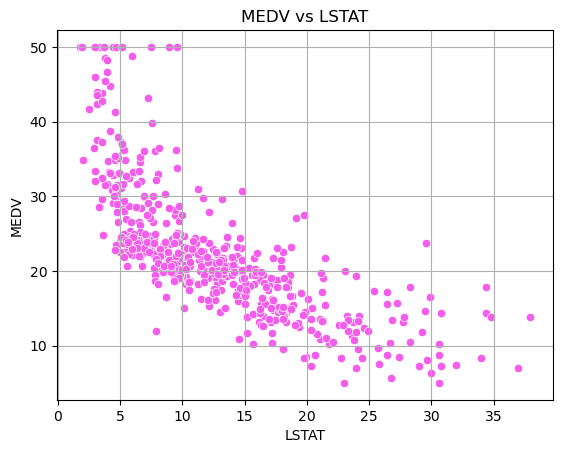

In [17]:
palette = sns.color_palette("husl", len(df.columns))

for idx, col in enumerate(df.columns):
    if col != "MEDV":
        plt.figure()
        sns.scatterplot(x=df[col], y=df["MEDV"], color=palette[idx])
        plt.title(f'MEDV vs {col}')
        plt.xlabel(col)
        plt.ylabel("MEDV")
        plt.grid()
        plt.show()


In [18]:
# Normalización de los datos
scaler = StandardScaler()

df_scaled=scaler.fit_transform(df.drop(columns='MEDV'))
df_scaled=pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['MEDV']=df['MEDV'].values
df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


In [19]:
# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_scaled[df_scaled.columns[0:13]], df["MEDV"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Resultados del modelo
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model.coef_
})

print("Intercepto (θ₀):", model.intercept_)
print(coeficientes)

y_pred = model.predict(X_test)

# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Intercepto (θ₀): 22.485268239316902
   Variable  Coeficiente
0      CRIM    -0.971494
1        ZN     0.701556
2     INDUS     0.276752
3      CHAS     0.706532
4       NOX    -1.991430
5        RM     3.115718
6       AGE    -0.177060
7       DIS    -3.045771
8       RAD     2.282785
9       TAX    -1.792605
10  PTRATIO    -1.979954
11        B     1.126499
12    LSTAT    -3.628149
Error absoluto medio (MAE): 3.19
Coeficiente de determinación (R²): 0.67


In [20]:

print("Entrenamiento:")
print(r2_score(y_train, model.predict(X_train)))
print("Prueba:")
print(r2_score(y_test, model.predict(X_test)))

Entrenamiento:
0.7508856358979673
Prueba:
0.6687594935356318


In [21]:
# Variables que están más correlacionadas con MEDV
x1=df_scaled['LSTAT']
x2=df_scaled['RM']
x3=df_scaled['PTRATIO']
x4=df_scaled['TAX']
y=df['MEDV']

data=pd.DataFrame({"LSTAT":x1, "RM":x2, "PTRATIO":x3, "TAX":x4, "MEDV":y})
data

,LSTAT,RM,PTRATIO,TAX,MEDV
0,-1.075562,0.413672,-1.459000,-0.666608,24.0
1,-0.492439,0.194274,-0.303094,-0.987329,21.6
2,-1.208727,1.282714,-0.303094,-0.987329,34.7
3,-1.361517,1.016303,0.113032,-1.106115,33.4
4,-1.026501,1.228577,0.113032,-1.106115,36.2
...,...,...,...,...,...
501,-0.418147,0.439316,1.176466,-0.803212,22.4
502,-0.500850,-0.234548,1.176466,-0.803212,20.6
503,-0.983048,0.984960,1.176466,-0.803212,23.9
504,-0.865302,0.725672,1.176466,-0.803212,22.0


In [22]:
# Mismo procedimiento anterior pero con las variables seleccionadas
X_train1, X_test1, y_train1, y_test1 = train_test_split(data[["LSTAT", "RM", "PTRATIO", "TAX"]], data["MEDV"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train1, y_train1)

coeficientes = pd.DataFrame({
    'Variable': X_train1.columns,
    'Coeficiente': model.coef_
})

print("Intercepto (θ₀):", model.intercept_)
print(coeficientes)

y_pred1 = model.predict(X_test1)

mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, y_pred1)
r2 = r2_score(y_test1, y_pred1)


print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Intercepto (θ₀): 22.413217094276845
  Variable  Coeficiente
0    LSTAT    -3.802933
1       RM     3.525457
2  PTRATIO    -1.729482
3      TAX    -0.491504
Error absoluto medio (MAE): 3.29
Coeficiente de determinación (R²): 0.63


In [23]:

print("Entrenamiento:")
print(r2_score(y_train1, model.predict(X_train1)))
print("Prueba:")
print(r2_score(y_test1, model.predict(X_test1)))

Entrenamiento:
0.6881698566624727
Prueba:
0.6276519117091853


In [24]:
#Ecuación normal
m=len(X_train) # Número de datos de entrenamiento 

n=len(df_scaled.columns)-1 # Número de características

X=np.zeros((n+1,m))

for i in range(1, n+1):
    X[0,:]=1
    X[i,:]=X_train[X_train.columns[i-1]]


print(np.shape(X))

Y = y_train.values.reshape(1, -1)

(14, 404)


In [25]:
cols = ['Intercepto'] + list(df.columns[1:])
vals = (theta(X, Y)).flatten()

for c, v in zip(cols, vals):
    print(f"{c}: {v:.4f}")

Intercepto: 22.4853
ZN: -0.9715
INDUS: 0.7016
CHAS: 0.2768
NOX: 0.7065
RM: -1.9914
AGE: 3.1157
DIS: -0.1771
RAD: -3.0458
TAX: 2.2828
PTRATIO: -1.7926
B: -1.9800
LSTAT: 1.1265
MEDV: -3.6281


# Intepretación Probabilistica.

Supongamos que tenemos una caracteristica $x_i$ con m valores de entrenamiento, si asumimos que cada valor $y_i$ presenta una dispersión gaussiana $\epsilon_i$, cada $y_i$ podrá tener el siguiente valor:

$y^{i} = \Theta^T X^{(i)} + \epsilon_i$

Asumiendo ademas que el ruido gaussiando es aleatorio y esta distribuido de forma identica, con media cero y varianza $\sigma$, tenemos que la probabilidad de que la cantidad y tenga  dispersion $\epsilon_i$ es:
\begin{equation}
p(\epsilon^{(i)})=\frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( \epsilon^{(i)}\right)^2 }{2\sigma ^2}}
\end{equation}

Escribiendo, lo anterior en terminos de la probabilidad de obtener un valor de $y^{i}$ dado un $x^{i}$ parametrizado por $\theta$ obtenemos que:


\begin{equation}
p_i(y^{i}|x^{i};\theta)=\frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}}
\end{equation}



Si ausmimos independencia estadística de cada $\epsilon^{(i)}$, la probabilidad $L(\theta)$ asociada a toda la distribución de puntos viene dada por:

\begin{equation}
\cal{L}(\theta) = p(\vec{y}|X;\theta)=\prod_{i=1}^{n} p_i(y^{i}|x^{i};\theta)
\end{equation}



\begin{equation}
\cal{L}(\theta) =\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}}
\end{equation}

para tener la mejor estimación posible de los valores que se deben elegir de  $\theta$, se escogeran los parámetros que generan la mayor probabilidad de ocurrencia según las observaciones, es decir, aquellos valores para el cual $L(\theta)$ es máximo, si aplicamos el logaritmo natural antes de máximar tenemos que:

\begin{equation}
\ln \cal{L}(\theta) = \cal{l}(\theta) = \ln \left[\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}} \right]
\end{equation}


Después de un par de pasos se puede encontrar que:

\begin{equation}
\cal{l}(\theta) = n\ln \frac{1}{\sqrt{2\pi\sigma}} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y^{i}-\Theta^T X^{i})^2
\end{equation},

maximar $\cal{l(\theta)}$ equivale a encontrar donde  $\nabla_{\theta} \cal{l(\theta)} = 0$. Lo anterior muestra por que la elección de minimos cuadrados puede ser una buena eleccción para el analisis de los datos.

## **Conclusiones**

El análisis del modelo de regresión multivariada muestra que el uso de todas las variables disponibles proporciona un rendimiento superior en comparación con modelos que utilizan únicamente un subconjunto de características. Esto se refleja en una disminución del error absoluto medio (MAE) y en un incremento del coeficiente de determinación (R²), lo que evidencia una mayor capacidad del modelo para aproximarse a los valores reales del conjunto de prueba. En otras palabras, el precio promedio de las viviendas (MEDV) depende simultáneamente de múltiples factores, por lo que eliminar algunas características limita la habilidad del modelo para capturar adecuadamente dichas relaciones.

Asimismo, al contrastar los resultados obtenidos mediante la ecuación normal con los generados por la implementación de scikit-learn, se observa que tanto los coeficientes como el término independiente presentan valores prácticamente idénticos. Esto confirma la consistencia matemática entre ambas metodologías y valida la implementación teórica realizada.
